In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df  = pd.read_csv("data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [43]:
df.isna().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [44]:
col = [var for var in df.columns if df[f"{var}"].isnull().mean()*100<5.00 and df[f"{var}"].isnull().mean()*100 > 0.00 ]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [45]:
df = df[col]
df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [46]:
new_df = df.dropna()

In [47]:
new_df.shape[0]/df.shape[0]

0.8968577095730244

<Axes: xlabel='training_hours', ylabel='Density'>

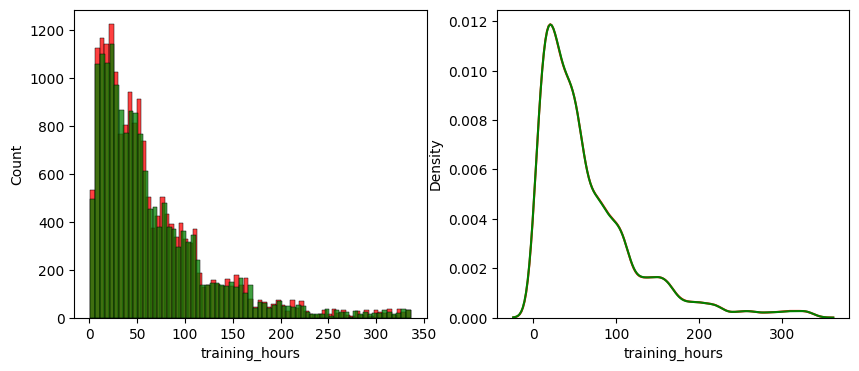

In [63]:
fig,(ax1,ax2)= plt.subplots(ncols=2,nrows=1,figsize = (10,4))
sns.histplot(df["training_hours"],color='red',ax=ax1)
sns.histplot(new_df["training_hours"],ax=ax1,color='green')


sns.kdeplot(df,x=df["training_hours"],color='red',ax=ax2)
sns.kdeplot(new_df["training_hours"],ax=ax2,color='green')


<Axes: xlabel='experience', ylabel='Density'>

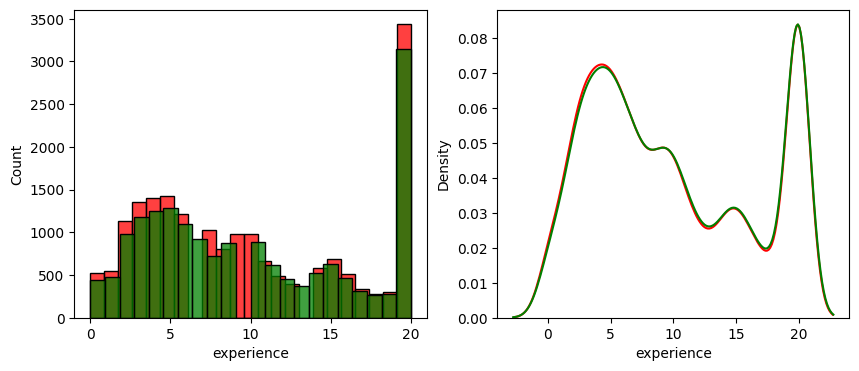

In [64]:
fig,(ax1,ax2)= plt.subplots(ncols=2,nrows=1,figsize = (10,4))
sns.histplot(df["experience"],color='red',ax=ax1)
sns.histplot(new_df["experience"],ax=ax1,color='green')


sns.kdeplot(df,x=df["experience"],color='red',ax=ax2)
sns.kdeplot(new_df["experience"],ax=ax2,color='green')


<Axes: xlabel='city_development_index', ylabel='Density'>

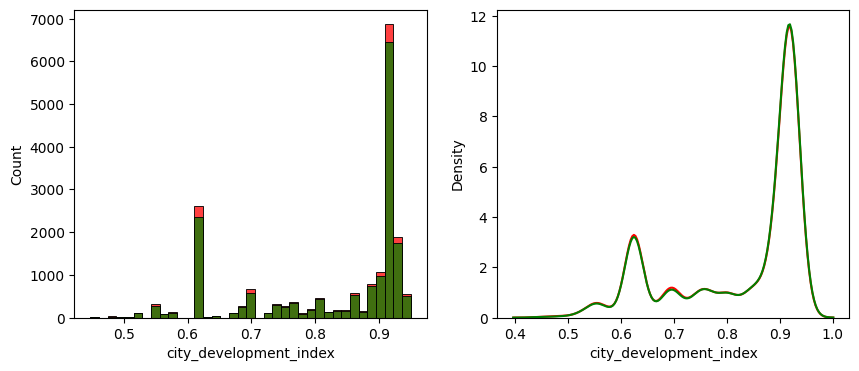

In [65]:
fig,(ax1,ax2)= plt.subplots(ncols=2,nrows=1,figsize = (10,4))
sns.histplot(df["city_development_index"],color='red',ax=ax1)
sns.histplot(new_df["city_development_index"],ax=ax1,color='green')


sns.kdeplot(df,x=df["city_development_index"],color='red',ax=ax2)
sns.kdeplot(new_df["city_development_index"],ax=ax2,color='green')

In [68]:
col = [var for var in df.columns if df[var].dtypes==object]
col

['enrolled_university', 'education_level']

<Axes: xlabel='enrolled_university', ylabel='Count'>

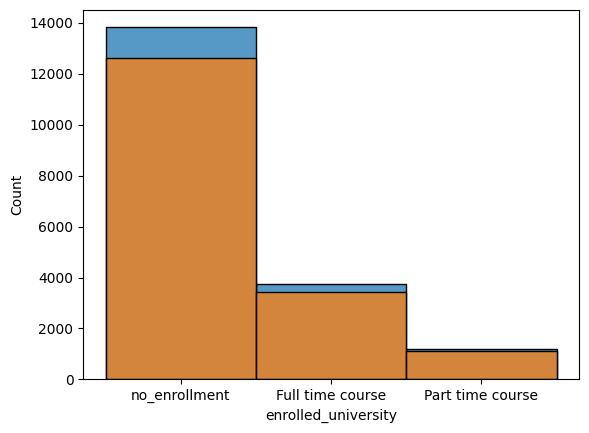

In [70]:

sns.histplot(df["enrolled_university"])
sns.histplot(new_df["enrolled_university"])


In [82]:
pd.concat([df["enrolled_university"].value_counts()/len(df)*100,new_df["enrolled_university"].value_counts()/len(new_df)*100],axis=1)

,count,count
enrolled_university,,
no_enrollment,72.121307,73.518799
Full time course,19.610607,20.073333
Part time course,6.253262,6.407869


In [83]:
pd.concat([df["education_level"].value_counts()/len(df)*100,new_df["education_level"].value_counts()/len(new_df)*100],axis=1)

,count,count
education_level,,
Graduate,60.538678,61.983471
Masters,22.763336,23.408218
High School,10.528239,10.737982
Phd,2.160977,2.211617
Primary School,1.607683,1.658713
